In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
lm = LinearRegression()
lr = LogisticRegression()
scores1 = cross_val_score(knn,X,y,cv=10, scoring='accuracy')
scores2 = cross_val_score(lm,X,y,cv=10, scoring='mean_squared_error')
scores3 = cross_val_score(lr,X,y,cv=10, scoring='mean_squared_error')
print scores1.mean()
print scores2.mean()
print scores3.mean()

0.966666666667
-0.0587477622083
-0.0466666666667


/Users/kong/.virtualenvs/ai2/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [6]:
from sklearn.grid_search import GridSearchCV

In [7]:
k_range = range(1,31)

In [8]:
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [9]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [10]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [11]:
grid.grid_scores_t

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [26]:
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [28]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

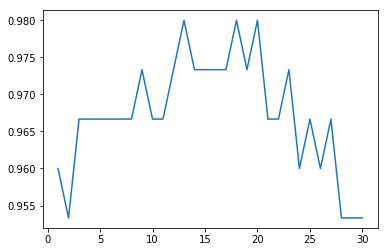

In [29]:
plt.plot(k_range, grid_mean_scores)

In [30]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [43]:
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [44]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [47]:
from sklearn.grid_search import RandomizedSearchCV

In [48]:
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [55]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=20)
rand.fit(X,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 11, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13, 'weights': 'uniform'},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 24, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'distance'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 12, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'distance'},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 25, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.96667, std: 0.04